In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import os
pathorig = '/Users/raiziel/'
os.chdir(pathorig) 

In [79]:
# Initial Conditions
L = 1 # Pendulum rod length(m)
m = 1 # mass of pendulum bob (kg)
w = 1 # drive frequency(s-1)
A = 1 # drive amplitude(m)
g = 9.81 # gravity(m/s^2)
alpha = 0 # damping coefficient
y0 = [2.4,0] # Initial Conditions; theta, dtheta/dt 
#z0 = [2.4+dz,0] # Initial Conditions; ztheta, zdtheta/dt
tmax, dt = 30, 0.01 # Maximum Time, Time Point Spacing (s)
t = np.arange(0, tmax+dt, dt) # Time Grid(s)

# Small changes in intial conditions
dz = 1e-4   # change in ztheta
dw = .8   # change in drive frequency
dA = .5  # change in drive amplitude
dalpha = 0.23 # change in damping coefficient

z0 = [2.4+dz,0] # Initial Conditions; ztheta, zdtheta/dt
w = w + dw
A = A + dA    
alpha = alpha + dalpha





In [98]:
def Initial(y,yprime):
    # Conditional to avoid ln(0) error and add a small value 
    if ((y-yprime).all()==0):
        plt.plot(np.log(np.abs(y-yprime)+0.0000001))
        plt.xlabel('time, t(s)')
        plt.ylabel('Δθ(t)')
        plt.title("Observation of Changes with Differences in Initial Conditions")
    
    else:
        plt.plot(np.log(np.abs(y-yprime)))
        plt.xlabel('time, t(s)')
        plt.ylabel('Δθ(t)')
        plt.title("Observation of Changes with Differences in Initial Conditions")

In [99]:
def deriv(y, t, L, w, A, m):
    """Return the first derivatives of y = theta, thetadot."""
    theta, thetadot = y
    
    
    dtheta_dt = thetadot 
    # thetadot = -(Torque of the weight) - (Resistive Force + Driving Force)
    dthetadot_dt = -g/L*np.sin(theta) - ((alpha*dtheta_dt + A*np.cos(w*t))/m*L*L)
    
    
    return dtheta_dt, dthetadot_dt



# Do the numerical integration of the equations of motion

y = odeint(deriv, y0, t, args=(L, w, A, m))


# Unpack theta and thetadot as a function of time

theta, thetadot = y[:,0], y[:,1]

# Convert to Cartesian coordinates of the two bob positions.

x = L * np.sin(theta)
y = -L * np.cos(theta)







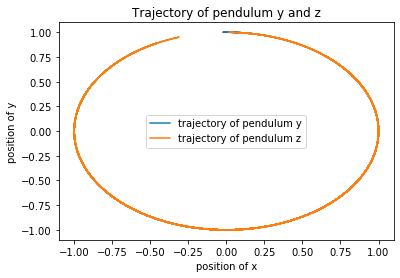

In [100]:
plt.plot(x,y,label="trajectory of pendulum y")
plt.plot(zx,z,label="trajectory of pendulum z")
plt.title("Trajectory of pendulum y and z")
plt.xlabel("position of x")
plt.ylabel("position of y")
plt.legend()

In [82]:
def zderiv(z, t, L, w, A, m):
    """Return the first derivatives of y = theta, thetadot."""
    ztheta, zthetadot = z
    
    
    zdtheta_dt = zthetadot
    # zthetadot = -(Torque of the weight of m) - (Resistive Force + Driving Force
    zdthetadot_dt = -g/L*np.sin(ztheta) - ((alpha*zdtheta_dt + A*np.cos(w*t))/m*L*L)
    
    
    return zdtheta_dt, zdthetadot_dt



# Do the numerical integration of the equations of motion 

z = odeint(zderiv, z0, t, args=(L, w, A, m))


# Unpack ztheta and zthetadot as a function of time

ztheta, zthetadot = z[:,0], z[:,1]

# Convert to Cartesian coordinates of the two bob positions.

zx = L * np.sin(ztheta)
z = -L * np.cos(ztheta)







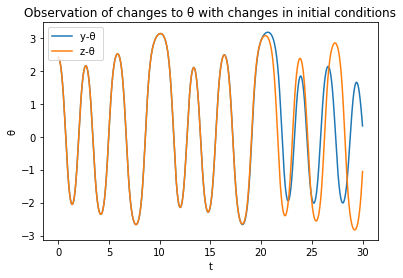

In [83]:
plt.plot(t,theta,label='y-θ ')
plt.plot(t,ztheta,label='z-θ ')
plt.xlabel("t")
plt.ylabel("θ")
plt.title("Observation of changes to θ with changes in initial conditions")
plt.legend()

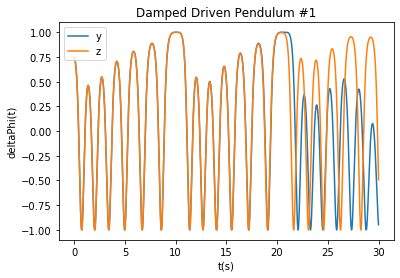

In [84]:
plt.plot(t,y,label="y")
plt.plot(t,z,label="z")
plt.xlabel("t(s)")
plt.ylabel("deltaPhi(t)")
plt.title("Damped Driven Pendulum #1")
plt.legend()

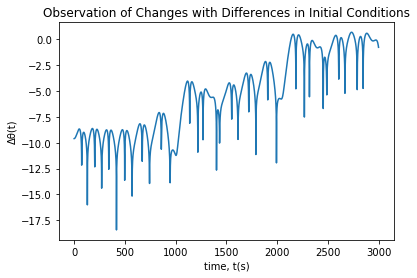

In [101]:
Initial(y,z)

Text(0, 0.5, 'dθ ')

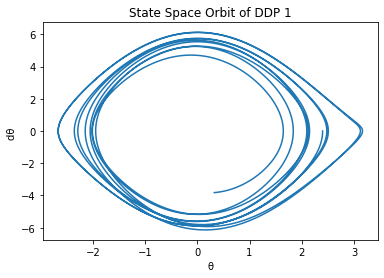

In [86]:
plt.plot(theta,thetadot)
plt.title("State Space Orbit of DDP 1")
plt.xlabel("θ")
plt.ylabel("dθ ")

Text(0, 0.5, 'dθ ')

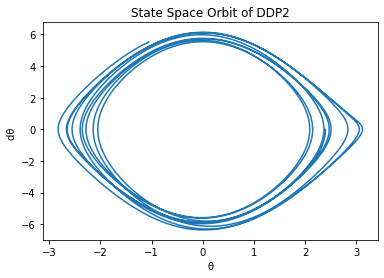

In [87]:
plt.plot(ztheta,zthetadot)
plt.title("State Space Orbit of DDP2")
plt.xlabel("θ")
plt.ylabel("dθ ")

Text(0, 0.5, 'dθ ')

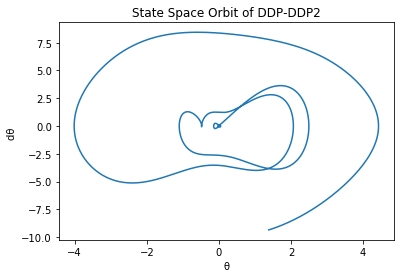

In [88]:
plt.plot(theta-ztheta,thetadot-zthetadot)
plt.title("State Space Orbit of DDP-DDP2")
plt.xlabel("θ")
plt.ylabel("dθ ")